In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.   **Download the dataset**
2.   **Load the dataset**




In [56]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/IBM/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [57]:
data.info()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


0

In [58]:
data.shape

(10000, 14)

In [59]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [60]:
# maximum data in dataset
maxdata = data.max()
maxdata

RowNumber              10000
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
Exited                     1
dtype: object

In [ ]:
# minimal data in the dataset
mindata = data.min()
mindata

In [61]:
data[['CreditScore','Age','Tenure','Balance','EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


# Measure of central tendency

In [62]:
# mean
data.mean()/100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


RowNumber              50.005000
CustomerId         156909.405694
CreditScore             6.505288
Age                     0.389218
Tenure                  0.050128
Balance               764.858893
NumOfProducts           0.015302
HasCrCard               0.007055
IsActiveMember          0.005151
EstimatedSalary      1000.902399
Exited                  0.002037
dtype: float64

In [63]:
# median
data.median()/100

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


RowNumber              50.00500
CustomerId         156907.38000
CreditScore             6.52000
Age                     0.37000
Tenure                  0.05000
Balance               971.98540
NumOfProducts           0.01000
HasCrCard               0.01000
IsActiveMember          0.01000
EstimatedSalary      1001.93915
Exited                  0.00000
dtype: float64

In [64]:
# mode
data.mode() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15565701,Smith,850.0,France,Male,37.0,2.0,0.0,1.0,1.0,1.0,24924.92,0.0
1,2,15565706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15565714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15565779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15565796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15815628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,9997,15815645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,9998,15815656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,9999,15815660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Visualization

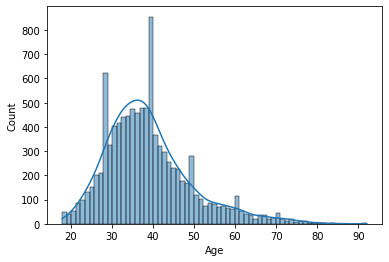

In [65]:
# histogram
sns.histplot(data.Age, kde=True)

Uni-variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


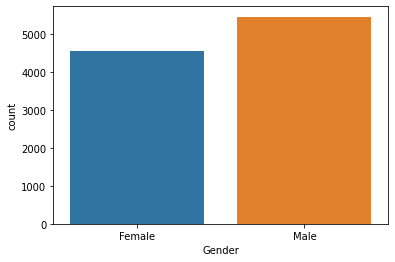

In [66]:
# plot count plot for the gender column
sns.countplot(data.Gender)

Bi-variate Analysis

In [67]:
data[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']].corr()

,Age,CreditScore,Balance,EstimatedSalary
Age,1.000000,-0.003965,0.028308,-0.007201
CreditScore,-0.003965,1.000000,0.006268,-0.001384
Balance,0.028308,0.006268,1.000000,0.012797
EstimatedSalary,-0.007201,-0.001384,0.012797,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 20000.0)

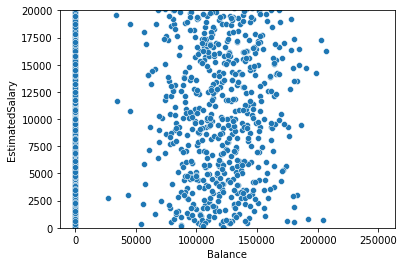

In [68]:
sns.scatterplot(data.Balance, data.EstimatedSalary)
plt.ylim(0,20000)

Multi-variate Analysis

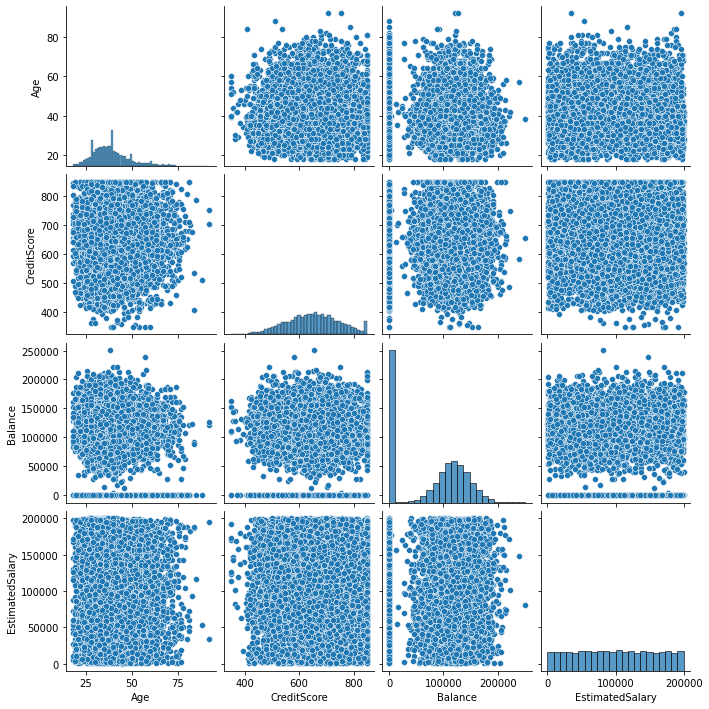

In [69]:
sns.pairplot(data[['Age', 'CreditScore', 'Balance', 'EstimatedSalary']])

Perform descriptive statistics on the dataset.

In [70]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Handle the Missing values.

In [71]:
# replace all the values in the dataset as Boolean value 
data.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
# replace all the value in the dataset with True for not null and otherwise False
data.notnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9996,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9997,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9998,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [73]:
# anotation the rangewise assigning
dataset_co = pd.DataFrame({
    "a": [1,2,3],
    "b": [4,None,None],
    "c": [5,6,None]
})
dataset_co

,a,b,c
0,1,4.0,5.0
1,2,NaN,6.0
2,3,NaN,NaN


In [74]:
dataset_co.isnull()

,a,b,c
0,False,False,False
1,False,True,False
2,False,True,True


In [75]:
# fill the missing values using the mean
value_mean = dataset_co.mean()
dataset_co.fillna(value_mean)
dataset_co

,a,b,c
0,1,4.0,5.0
1,2,NaN,6.0
2,3,NaN,NaN


In [76]:
# replace the null value in the dataset with specified value 
data.fillna(0)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Identifying outliers and replacing all

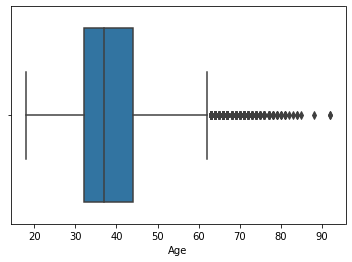

In [77]:
sns.boxplot(x=data['Age'])

In [78]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3 - q1
iqr

12.0

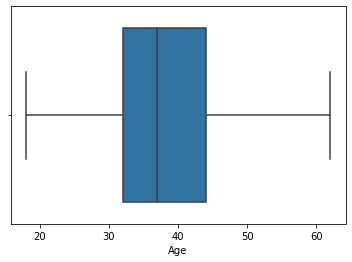

In [79]:
data.loc[data['Age'] < q1 - 1.5*iqr, 'Age'] = q1
data.loc[data['Age'] > q3 + 1.5*iqr, 'Age'] = q3
sns.boxplot(x=data['Age'])

# Checking for categorical Columns and perform encoding

In [80]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [81]:
surnames = data["Surname"].unique()
surname_encoding = {}
for i in range(len(surnames)):
  surname_encoding[surnames[i]] = i
len(surname_encoding)

2932

In [82]:
# the categorial columns are gender and geography and surname encoding
data["Geography"].replace({"France":0,"Spain":1,"Germany":3}, inplace=True)
data["Gender"].replace({"Female":0,"Male":1}, inplace=True)
data["Surname"].replace(surname_encoding, inplace=True)

In [83]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


# Spliting the data into dependant and independant set

In [84]:
y = data['Exited']
x = data.drop(columns=['Exited'], axis = 1)
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,0,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,3,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,4,850,1,0,43,2,125510.82,1,1,1,79084.10


# Scaling independant variables

In [85]:
from sklearn.preprocessing import scale

In [86]:
column_name = x.columns
x = scale(x)
x

array([[-1.73187761, -0.78321342, -1.22470312, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -1.22336735, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476, -1.22203159, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179, -0.01583695, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  1.1569636 , ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909, -0.47667543, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [87]:
X = pd.DataFrame(X, columns =column_name)
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,0,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,3,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,4,850,1,0,43,2,125510.82,1,1,1,79084.10


# Spliting data into training and testing datasets

In [88]:
from sklearn.model_selection import train_test_split

In [90]:
# Training and Testing data spliting
x_train, x_test, y_train, y_test = train_test_split(X,y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7500, 13), (2500, 13), (7500,), (2500,))